<a href="https://colab.research.google.com/github/piqueda/AI-Study/blob/main/exercicio_kmeans_Lab_PedroIqueda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 1

In [4]:
import pandas as pd
import numpy as np

data = {
    'HorasAtiv': [2, 3, 4, 6, 7, 8],
    'StressLv': [8, 7, 3, 4, 2, 5]
}
df = pd.DataFrame(data)

display(df)

,HorasAtiv,StressLv
0,2,8
1,3,7
2,4,3
3,6,4
4,7,2
5,8,5


In [7]:
from sklearn.cluster import KMeans
import numpy as np

initial_centroids = np.array([[2, 8], [8, 5]])
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, random_state=42)

df['cluster'] = kmeans.fit_predict(df[['HorasAtiv', 'StressLv']])

display(df)

print("Cluster Centroids:")
display(pd.DataFrame(kmeans.cluster_centers_, columns=['HorasAtiv', 'StressLv']))

,HorasAtiv,StressLv,cluster
0,2,8,0
1,3,7,0
2,4,3,1
3,6,4,1
4,7,2,1
5,8,5,1


Cluster Centroids:


,HorasAtiv,StressLv
0,2.50,7.5
1,6.25,3.5


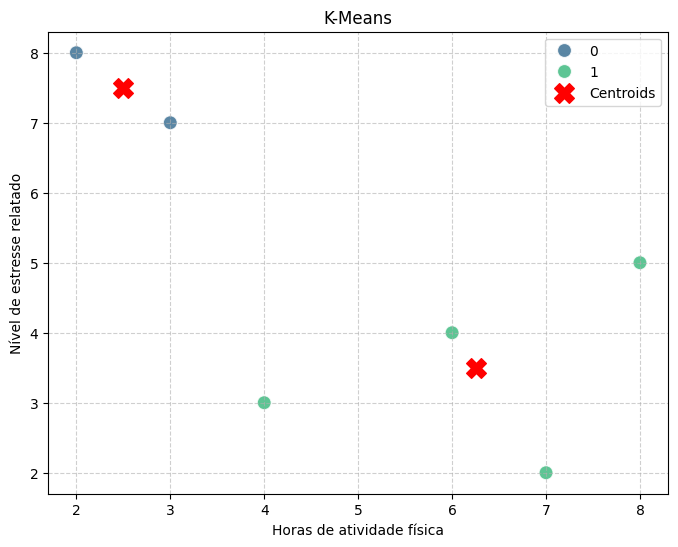

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='HorasAtiv',
    y='StressLv',
    hue='cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8,
    legend='full'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200,
    color='red',
    label='Centroids'
)

plt.title('K-Means')
plt.xlabel('Horas de atividade física')
plt.ylabel('Nível de estresse relatado')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Exercício 2

In [10]:
import pandas as pd
import numpy as np

data = {
    'MetIdx': [2, 3, 4, 8, 9, 10],
    'HorLv': [3, 4, 6, 2, 3, 5]
}
df = pd.DataFrame(data)

display(df)

,MetIdx,HorLv
0,2,3
1,3,4
2,4,6
3,8,2
4,9,3
5,10,5


In [11]:
from sklearn.cluster import KMeans
import numpy as np

initial_centroids = np.array([[2, 3], [10, 5]])
kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1, random_state=42)

df['cluster'] = kmeans.fit_predict(df[['MetIdx', 'HorLv']])

display(df)

print("Cluster Centroids:")
display(pd.DataFrame(kmeans.cluster_centers_, columns=['MetIdx', 'HorLv']))

,MetIdx,HorLv,cluster
0,2,3,0
1,3,4,0
2,4,6,0
3,8,2,1
4,9,3,1
5,10,5,1


Cluster Centroids:


,MetIdx,HorLv
0,3.0,4.333333
1,9.0,3.333333


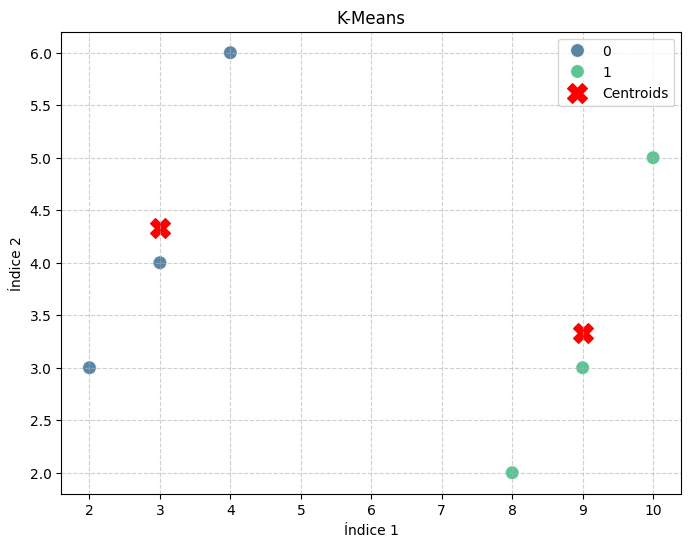

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='MetIdx',
    y='HorLv',
    hue='cluster',
    data=df,
    palette='viridis',
    s=100,
    alpha=0.8,
    legend='full'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=200,
    color='red',
    label='Centroids'
)

plt.title('K-Means')
plt.xlabel('Índice 1')
plt.ylabel('Índice 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#Exercício 4

In [13]:
import kagglehub

path = kagglehub.dataset_download("binovi/wholesale-customers-data-set")

print("Path to dataset files:", path)



100%|██████████| 6.85k/6.85k [00:00<00:00, 4.13MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/binovi/wholesale-customers-data-set/versions/1


In [21]:
import pandas as pd
import os

dataset_dir = path

data_file = os.path.join(dataset_dir, 'Wholesale customers data.csv')

wholesale_df = pd.read_csv(data_file)

print("Exibição:")
display(wholesale_df.head())

print("Features:")
for col in wholesale_df.columns:
    print(f"- {col}")

Exibição:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Features:
- Channel
- Region
- Fresh
- Milk
- Grocery
- Frozen
- Detergents_Paper
- Delicassen


Features escolhidas foram `Fresh` e `Milk`


In [27]:
X = wholesale_df[['Fresh', 'Milk']]
display(X.head())

,Fresh,Milk
0,12669,9656
1,7057,9810
2,6353,8808
3,13265,1196
4,22615,5410


In [25]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

print("WCSS values calculated.")

WCSS values calculated.


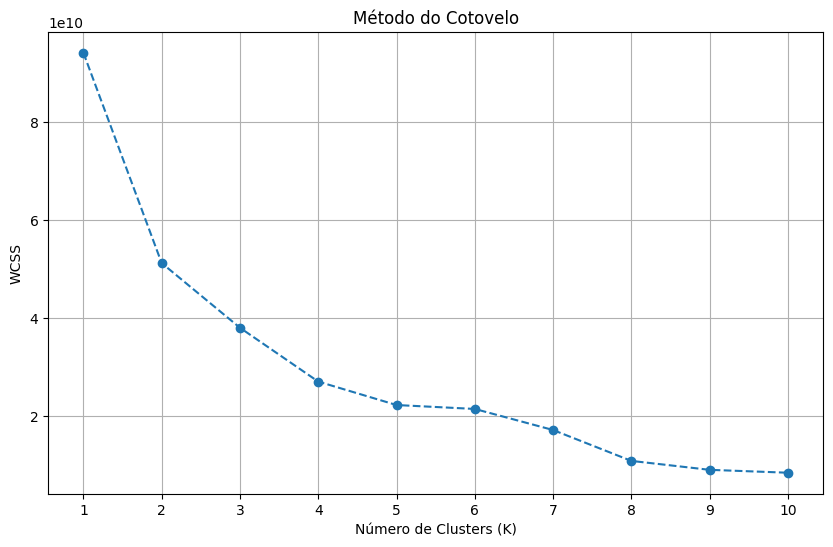

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.xticks(range(1, 11))
plt.show()


In [38]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=4, n_init=1, random_state=42)

wholesale_df['cluster'] = kmeans.fit_predict(wholesale_df.loc[:, ('Fresh', 'Milk')])

display(X)


,Fresh,Milk,cluster
0,12669,9656,0
1,7057,9810,0
2,6353,8808,0
3,13265,1196,1
4,22615,5410,1
...,...,...,...
435,29703,12051,1
436,39228,1431,2
437,14531,15488,1
438,10290,1981,0


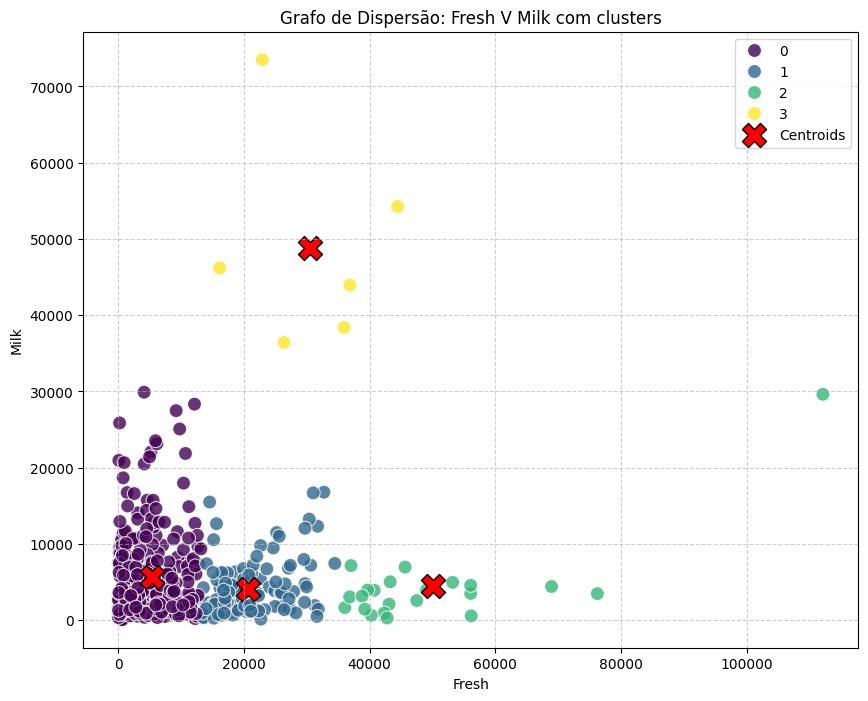

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='Fresh',
    y='Milk',
    hue='cluster',
    data=wholesale_df,
    palette='viridis',
    s=100,
    alpha=0.8,
    legend='full'
)

plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    marker='X',
    s=300,
    color='red',
    label='Centroids',
    edgecolors='black'
)

plt.title('Grafo de Dispersão: Fresh V Milk com clusters')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()